✅ Função 'selecionar_rois' importada com sucesso!
Processando 19 amostras...


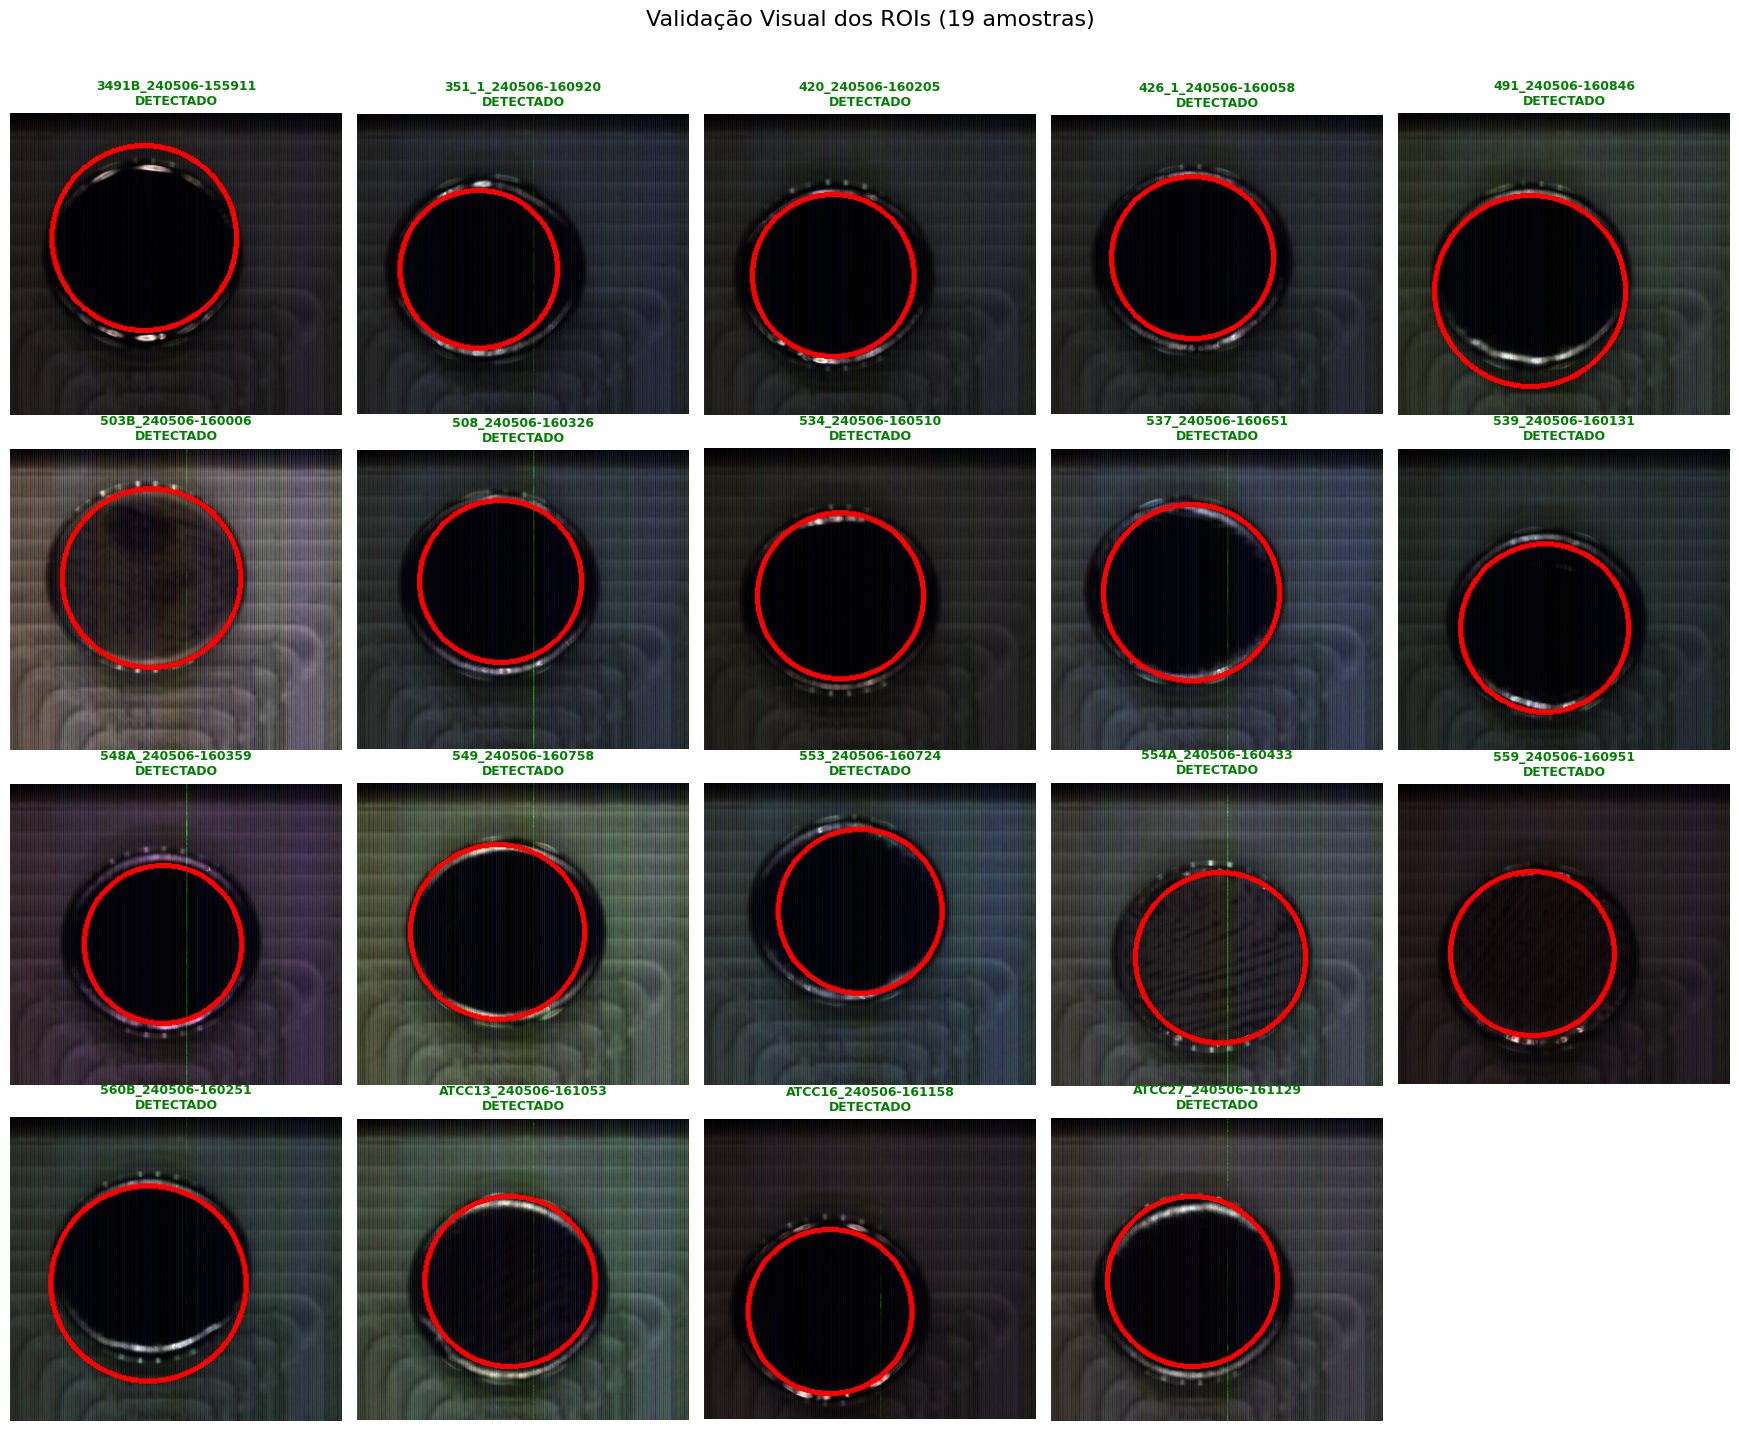

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import spectral
from pathlib import Path
import math

notebook_path = os.getcwd()
project_root = os.path.dirname(notebook_path)

if project_root not in sys.path:
    sys.path.append(project_root)
try:
    from src.rois import selecionar_rois
    from pipeline_completa import CONFIG 
    print("Função 'selecionar_rois' importada com sucesso!")
except ImportError as e:
    print(f"Erro ao importar: {e}")
    print("Verifique se o arquivo 'src/rois.py' existe e se 'pipeline_final.py' está na raiz.")
PATH_INPUT = Path(project_root) / "data/silver level/bandas_removidas"
bandas_ajustadas = (
    CONFIG["bandas_rgb_originais"][0] - CONFIG["bandas_remover_inicio"],
    CONFIG["bandas_rgb_originais"][1] - CONFIG["bandas_remover_inicio"],
    CONFIG["bandas_rgb_originais"][2] - CONFIG["bandas_remover_inicio"]
)
def visualizar_validacao_rois(path_pasta, bandas, param2):
    arquivos = sorted(list(path_pasta.glob("*.npy")))
    total_imgs = len(arquivos)
    if total_imgs == 0:
        print(f"Nenhum arquivo .npy encontrado em: {path_pasta}")
        return
    cols = 5
    rows = math.ceil(total_imgs / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.5, rows * 3.5))
    fig.suptitle(f"Validação Visual dos ROIs ({total_imgs} amostras)", fontsize=16, y=1.02)
    if total_imgs == 1: axes = [axes]
    ax_flat = axes.flatten() if total_imgs > 1 else axes
    print(f"Processando {total_imgs} amostras...")
    for i, arquivo in enumerate(arquivos):
        ax = ax_flat[i]
        nome_amostra = arquivo.stem
        try:
            cubo = np.load(arquivo)
            _, rgb_visualizacao, coords = selecionar_rois(cubo, bandas=bandas, param2_ajustado=param2)
            if rgb_visualizacao is not None:
                ax.imshow(rgb_visualizacao) 
                if coords is not None:
                    ax.set_title(f"{nome_amostra}\nDETECTADO", fontsize=9, color='green', fontweight='bold')
                else:
                    ax.set_title(f"{nome_amostra}\nSEM CÍRCULO", fontsize=9, color='orange', fontweight='bold')
            else:
                ax.set_title(f"{nome_amostra}\nErro RGB", fontsize=9, color='red')
        except Exception as e:
            ax.set_title(f"{nome_amostra}\nERRO", fontsize=8, color='red')
            print(f"Erro em {nome_amostra}: {e}")
        ax.axis('off')
    for j in range(i + 1, len(ax_flat)):
        ax_flat[j].axis('off')
    plt.tight_layout()
    plt.show()

visualizar_validacao_rois(PATH_INPUT, bandas_ajustadas, CONFIG["hough_param2"])